#### This cell imports the necessary Python libraries for data manipulation, numerical operations, plotting, and visualization.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### This cell loads the chennai_reservoir_levels.csv dataset into a pandas DataFrame named df. The raw string literal r'' is used for the file path to handle backslashes correctly.

In [60]:
df = pd.read_csv(r'C:\Users\DELL\OneDrive\Documents\IITG AI_ML\Python Projects\chennai_reservoir_levels.csv')

#### This cell displays the first five rows of the DataFrame df using the head() method, providing a quick overview of the data structure and content.

In [61]:
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


#### This cell displays a concise summary of the DataFrame df using the info() method. This includes the index dtype and column dtypes, non-null values, and memory usage.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             5647 non-null   object 
 1   POONDI           5647 non-null   float64
 2   CHOLAVARAM       5647 non-null   float64
 3   REDHILLS         5647 non-null   float64
 4   CHEMBARAMBAKKAM  5647 non-null   float64
dtypes: float64(4), object(1)
memory usage: 220.7+ KB


#### This cell converts the 'Date' column to datetime objects and then displays a summary of the DataFrame's structure and data types using df.info().

In [63]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 220.7 KB


#### This cell displays the names of all columns present in the DataFrame df.

In [64]:
df.columns

Index(['Date', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM'], dtype='object')

#### This cell calculates a 'Total' column by summing specific water body levels and then displays the first few rows of the updated DataFrame.

In [65]:
df['Total'] = df[['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']].sum(axis=1)
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Total
0,2004-01-01,3.9,0.0,268.0,0.0,271.9
1,2004-01-02,3.9,0.0,268.0,0.0,271.9
2,2004-01-03,3.9,0.0,267.0,0.0,270.9
3,2004-01-04,3.9,0.0,267.0,0.0,270.9
4,2004-01-05,3.8,0.0,267.0,0.0,270.8


#### This cell performs feature engineering by extracting the year and month components from the 'Date' column and creating new 'Year' and 'Month' columns in the DataFrame df. This is useful for time-series analysis or grouping data by these temporal units.

In [66]:
df['Year'] = df['Date'].apply(lambda x:x.year)
df['Month'] = df['Date'].apply(lambda x:x.month)
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Total,Year,Month
0,2004-01-01,3.9,0.0,268.0,0.0,271.9,2004,1
1,2004-01-02,3.9,0.0,268.0,0.0,271.9,2004,1
2,2004-01-03,3.9,0.0,267.0,0.0,270.9,2004,1
3,2004-01-04,3.9,0.0,267.0,0.0,270.9,2004,1
4,2004-01-05,3.8,0.0,267.0,0.0,270.8,2004,1


#### This cell aggregates the water data by 'Year' using the groupby() function and calculates the mean of the water levels for 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM', and 'Total' for each year. This provides a summary of the average water levels per year in the respective regions.

In [67]:
Yearwise = df.groupby('Year',as_index=False).mean()[['Year','POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM','Total']]
Yearwise

,Year,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Total
0,2004,77.766967,19.060109,220.899180,68.683060,386.409317
1,2005,722.680603,147.771781,1468.480712,581.345205,2920.278301
2,2006,1827.553425,484.947945,2044.356164,2075.317808,6432.175342
3,2007,1794.912329,286.391781,2356.654795,1715.126027,6153.084932
4,2008,1862.338798,545.609290,2445.161202,2196.967213,7050.076503
5,2009,1846.221918,414.882110,1969.731205,1795.677123,6026.512356
6,2010,1651.523288,382.175342,2045.271233,2020.501370,6099.471233
7,2011,2399.068493,499.509589,2573.326027,2492.282192,7964.186301
8,2012,1742.816940,225.934426,1872.218579,1571.677596,5412.647541
9,2013,536.953425,100.049315,1324.109589,988.964384,2950.076712


#### This bar plot visualizes the mean yearly water levels (in MCM - Million Cubic Meters) across all four reservoirs supplying Chennai from 2004 to 2019. Each bar represents the average water level for a given year, providing an overview of the water availability trends over this period. The plot helps in understanding the fluctuations and overall patterns of water levels, which is crucial for analyzing the Chennai water crisis.

C:\Users\DELL\AppData\Local\Temp\ipykernel_10724\3875970323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year',y='Total',data=Yearwise,palette='Set2')


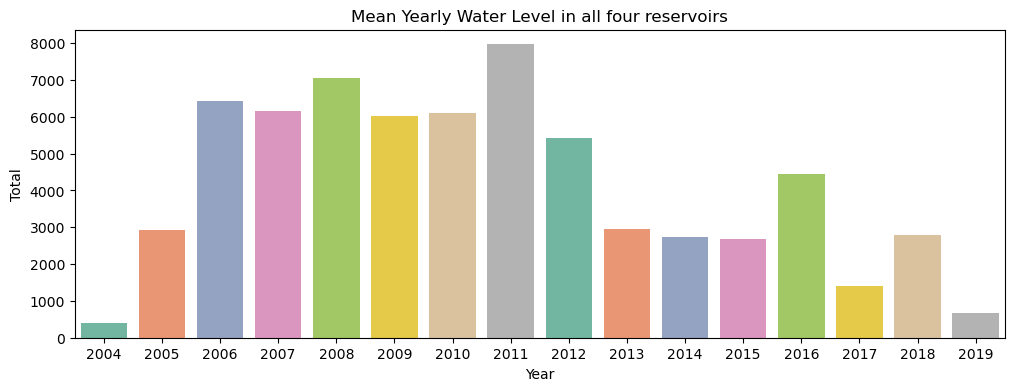

In [68]:
plt.figure(figsize=(12,4))
sns.barplot(x='Year',y='Total',data=Yearwise,palette='Set2')
plt.title('Mean Yearly Water Level in all four reservoirs')
plt.show()

#### This cell generates a line plot showing the year-wise water levels or availability for various reservoirs/locations in Chennai (Poondi, Cholavaram, Redhills, Chembarambakkam)

<Axes: xlabel='Year'>

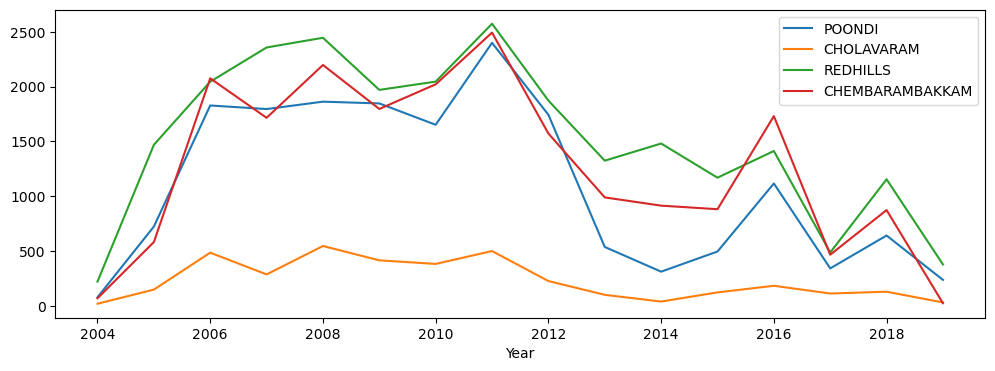

In [69]:
Yearwise.plot(x='Year',y=['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM'],figsize=(12,4))

#### This cell converts the 'Month' and 'Day' columns in a pandas DataFrame df to categorical data types, which can be useful for analysis or plotting.

In [70]:
df['Month'] = pd.Categorical(df['Month'])
df['Year'] = pd.Categorical(df['Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
 5   Total            5647 non-null   float64       
 6   Year             5647 non-null   category      
 7   Month            5647 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 276.9 KB


#### This cell generates a bar plot visualizing the total water levels in Chennai's reservoirs on a monthly basis across different years (2005-2019). It uses seaborn.barplot to display the 'Total' water level against 'Year', with 'Month' used for color differentiation.

<Axes: xlabel='Year', ylabel='Total'>

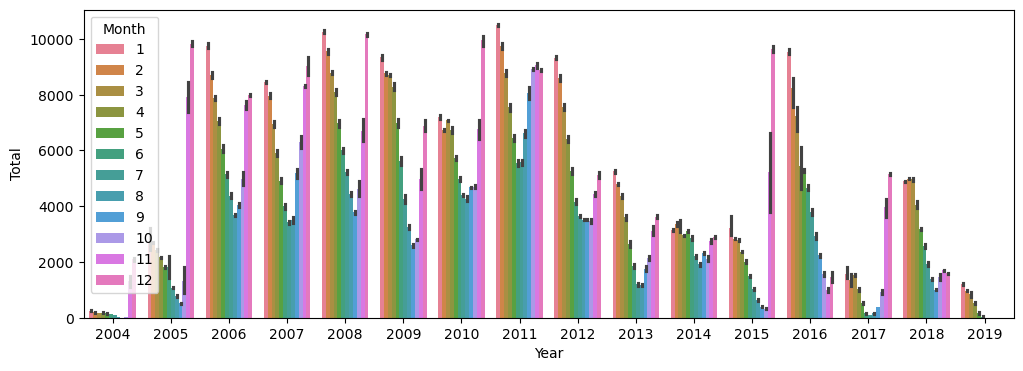

In [71]:
plt.figure(figsize=(12,4))
sns.barplot(x='Year',y='Total',data=df,hue='Month')

#### This cell generates a bar plot showing the yearly water levels in Chennai's reservoirs

C:\Users\DELL\AppData\Local\Temp\ipykernel_10724\413776920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year',y='Total',data=jan,palette='Set2')


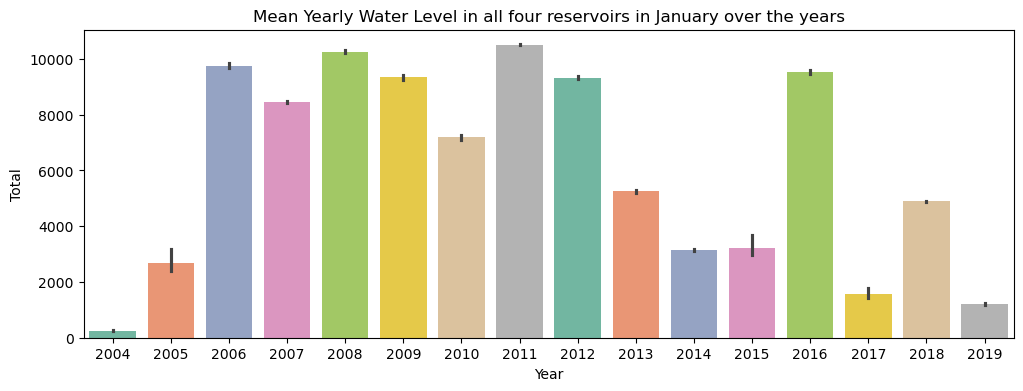

In [90]:
jan = df[df['Month']==1]
plt.figure(figsize=(12,4))
sns.barplot(x='Year',y='Total',data=jan,palette='Set2')
plt.title('Mean Yearly Water Level in all four reservoirs in January over the years')
plt.show()

#### This cell describes the visualization of the mean yearly water levels in the four Chennai reservoirs during December, spanning from 2004 to 2019.

C:\Users\DELL\AppData\Local\Temp\ipykernel_10724\3483762431.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year',y='Total',data=dec,palette='Set2')


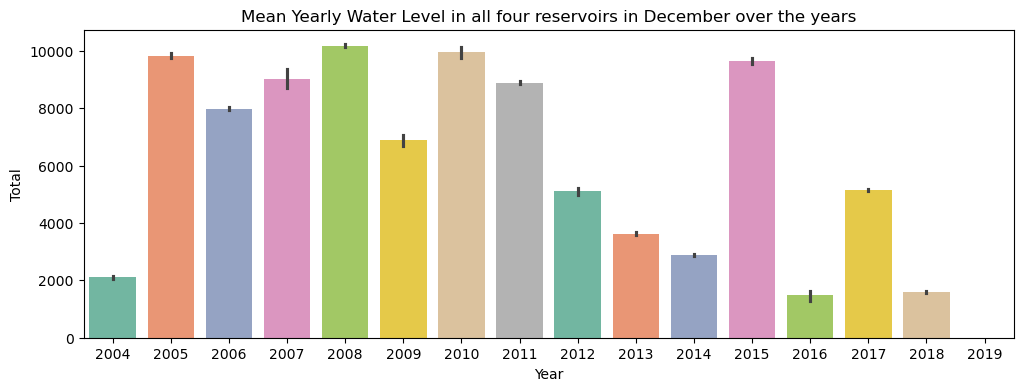

In [92]:
dec = df[df['Month']==12]
plt.figure(figsize=(12,4))
sns.barplot(x='Year',y='Total',data=dec,palette='Set2')
plt.title('Mean Yearly Water Level in all four reservoirs in December over the years')
plt.show()